# Problem Defination
# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

In [399]:
import pandas as pd
import numpy as np

In [400]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [401]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [402]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014,12-10-2006,04-06-2000,03-02-1990,05-02-1997,25-07-2011,...,05-02-1994,12-07-2006,24-10-2007,08-12-2001,24-03-2007,16-07-1991,05-01-2014,17-02-2003,18-11-2011,11-11-1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


In [403]:
df.shape

(1000, 40)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [405]:
df['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [406]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [407]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [408]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [409]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [410]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [411]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [412]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [413]:
df['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [414]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [415]:
df['collision_type']=df['collision_type'].replace('?', np.NaN)

In [416]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [417]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [418]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [419]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [420]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [421]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [422]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [423]:
df['property_damage']=df['property_damage'].replace('?', np.NaN)

In [424]:
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [425]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [426]:
df['police_report_available']=df['police_report_available'].replace({'?':np.nan})

In [427]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [428]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [429]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [430]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [431]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Dropping _c39 as it has only nan values. It will have no contribution in prediction

In [432]:
df1=df.drop(columns='_c39')

In [433]:
df1.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [434]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [435]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [436]:
df1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014,12-10-2006,04-06-2000,03-02-1990,05-02-1997,25-07-2011,...,05-02-1994,12-07-2006,24-10-2007,08-12-2001,24-03-2007,16-07-1991,05-01-2014,17-02-2003,18-11-2011,11-11-1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


Following analysis has been made:

    1. months_as_customer is given, so we can drop policy bind date and date of incident
    2. policy number is unique for everyone so it can also be drop
    3. 'incident_state', 'incident_city','incident_location' only one parameter could be considered.
    4. insured_hobbies can also be dropped, as it seems irrelevent.
    5. 'auto_make','auto_model', 'auto_year', out of these one parameter can be condsidered.

In [437]:
df2=df1.drop(columns='policy_bind_date')
df3=df2.drop(columns='incident_date')
df4=df3.drop(columns='policy_number')
df5=df4.drop(columns='incident_city')
df6=df5.drop(columns='incident_location')
df7=df6.drop(columns='insured_hobbies')
df8=df7.drop(columns='auto_year')
df9=df8.drop(columns='auto_model')

In [438]:
df9.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,NO,0,0,NO,5070,780,780,3510,Mercedes,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,0,1,NO,6500,1300,650,4550,Accura,N


In [439]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [440]:
d1=le.fit_transform(df9['policy_state'])
d2=le.fit_transform(df9['policy_csl'])
d3=le.fit_transform(df9['insured_sex'])
d4=le.fit_transform(df9['insured_education_level'])
d5=le.fit_transform(df9['insured_occupation'])
d6=le.fit_transform(df9['insured_relationship'])
d7=le.fit_transform(df9['incident_type'])
d8=le.fit_transform(df9['collision_type'])
d9=le.fit_transform(df9['incident_severity'])
d10=le.fit_transform(df9['authorities_contacted'])
d11=le.fit_transform(df9['incident_state'])
d12=le.fit_transform(df9['property_damage'])
d13=le.fit_transform(df9['police_report_available'])
d14=le.fit_transform(df9['auto_make'])
d15=le.fit_transform(df9['fraud_reported'])

In [441]:
df9['policy_state']=d1
df9['policy_csl']=d2
df9['insured_sex']=d3
df9['insured_education_level']=d4
df9['insured_occupation']=d5
df9['insured_relationship']=d6
df9['incident_type']=d7
df9['collision_type']=d8
df9['incident_severity']=d9
df9['authorities_contacted']=d10
df9['incident_state']=d11
df9['property_damage']=d12
df9['police_report_available']=d13
df9['auto_make']=d14
df9['fraud_reported']=d15

In [442]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [443]:
df9.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,0,0,5070,780,780,3510,8,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,0,2,3,0,34650,7700,3850,23100,4,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,0,1,2,0,63400,6340,6340,50720,3,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,0,1,0,6500,1300,650,4550,0,0


In [444]:
df9.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,1.000000


In [445]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

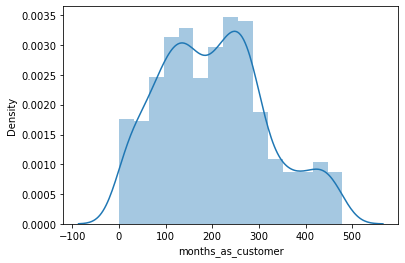

In [446]:
sns.distplot(df9["months_as_customer"])

<AxesSubplot:xlabel='age', ylabel='Density'>

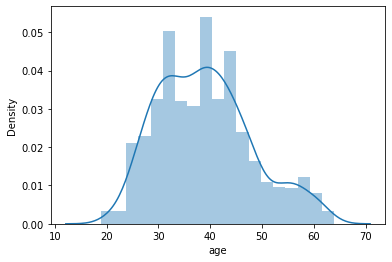

In [447]:
sns.distplot(df9["age"])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

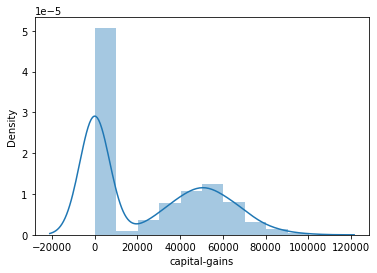

In [448]:
sns.distplot(df9["capital-gains"])

<AxesSubplot:>

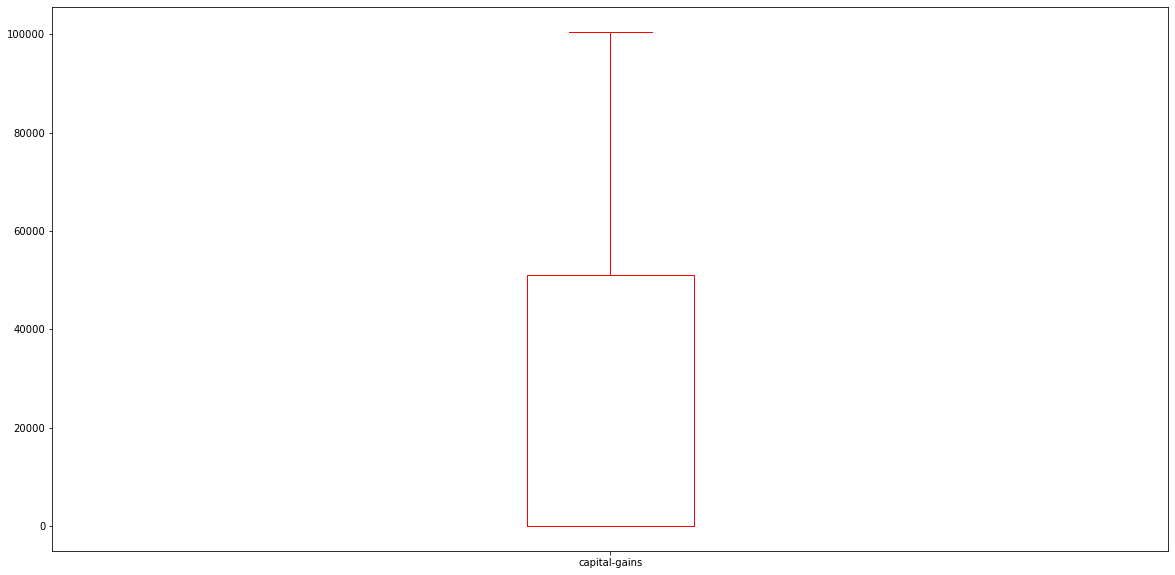

In [449]:
df9["capital-gains"].plot(kind='box',figsize=(20,10), color='r')

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

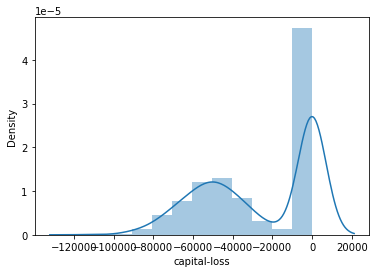

In [450]:
sns.distplot(df9["capital-loss"])

<AxesSubplot:>

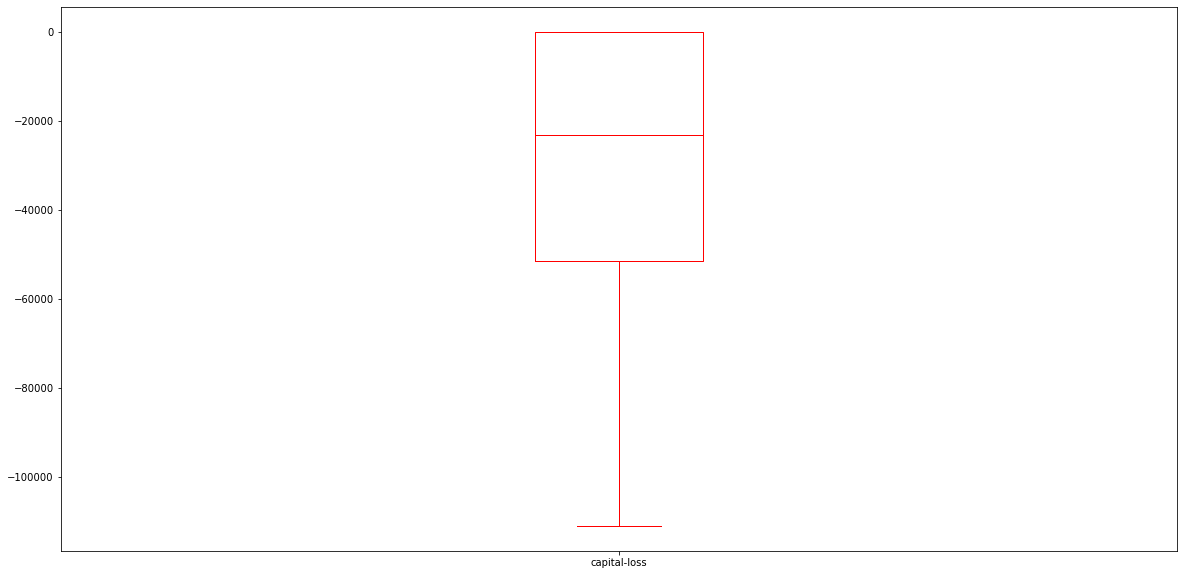

In [451]:
df9["capital-loss"].plot(kind='box',figsize=(20,10), color='r')

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

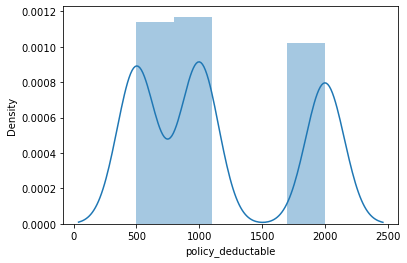

In [452]:
sns.distplot(df9["policy_deductable"])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

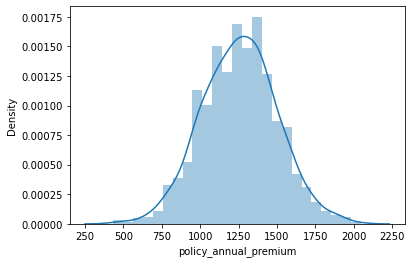

In [453]:
sns.distplot(df9["policy_annual_premium"])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

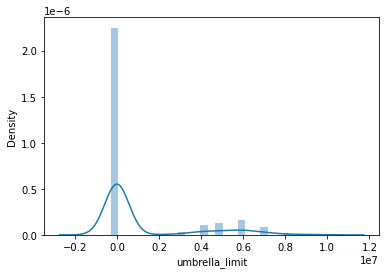

In [454]:
sns.distplot(df9["umbrella_limit"])

<AxesSubplot:>

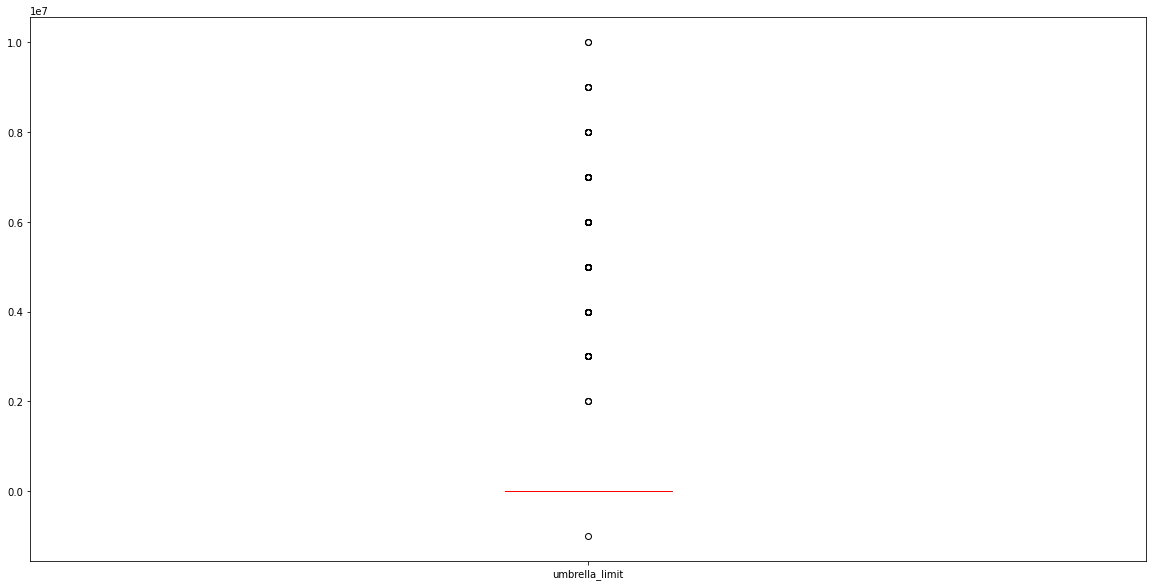

In [455]:
df9["umbrella_limit"].plot(kind='box',figsize=(20,10), color='r')

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

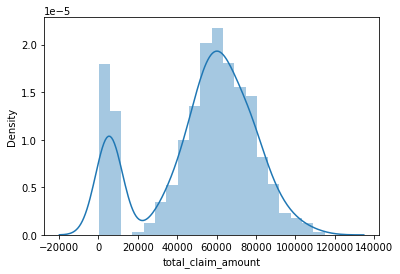

In [456]:
sns.distplot(df9["total_claim_amount"])

<AxesSubplot:>

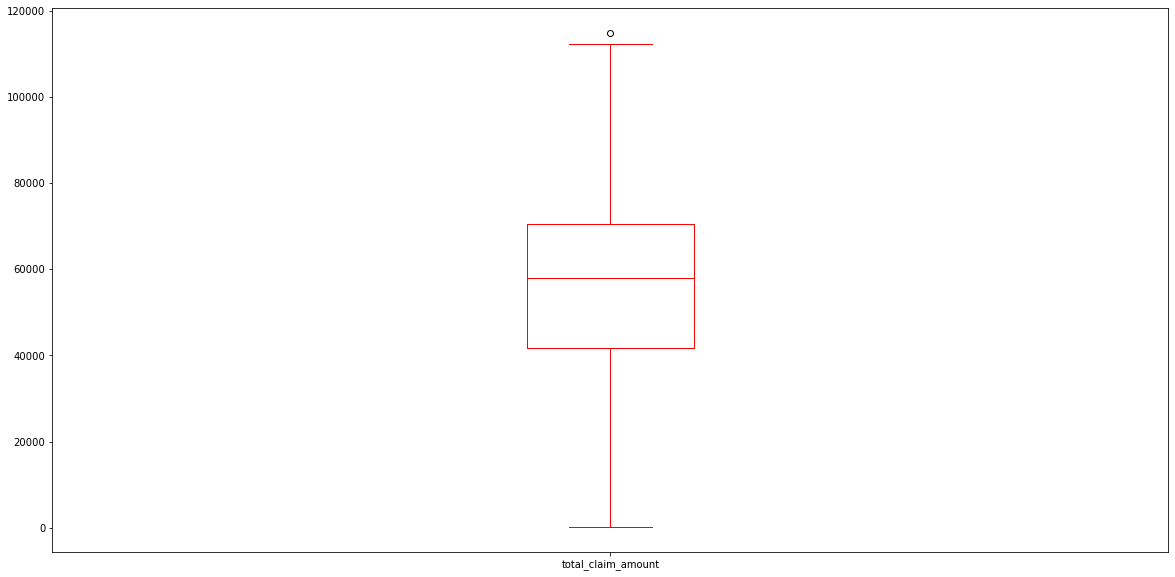

In [457]:
df9["total_claim_amount"].plot(kind='box',figsize=(20,10), color='r')

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

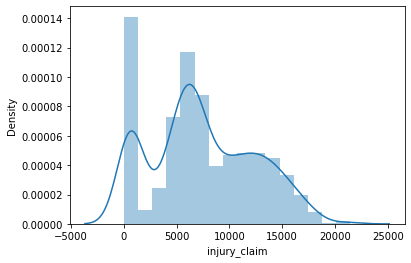

In [458]:
sns.distplot(df9["injury_claim"])

<AxesSubplot:>

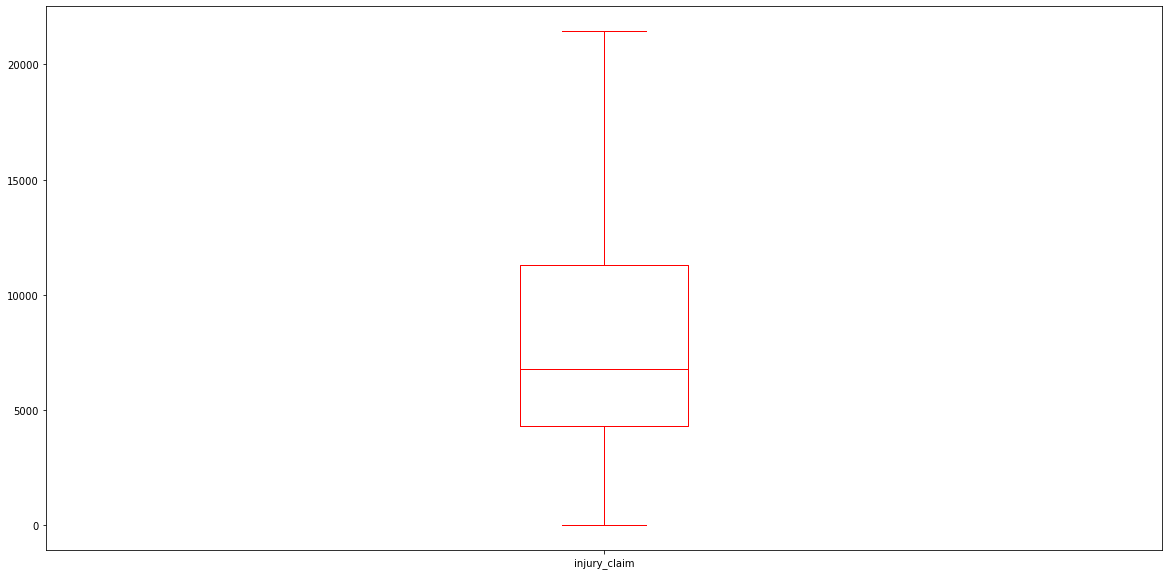

In [459]:
df9["injury_claim"].plot(kind='box',figsize=(20,10), color='r')

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

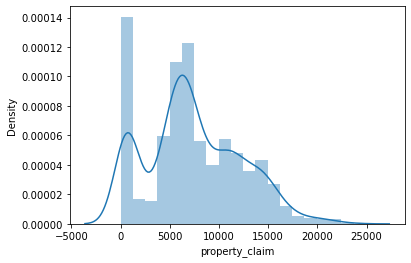

In [460]:
sns.distplot(df9["property_claim"])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

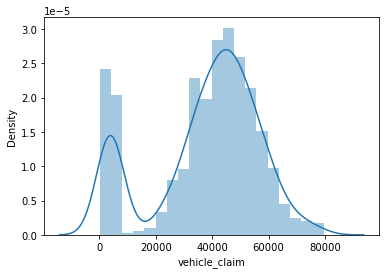

In [461]:
sns.distplot(df9["vehicle_claim"])

<AxesSubplot:xlabel='auto_make', ylabel='Density'>

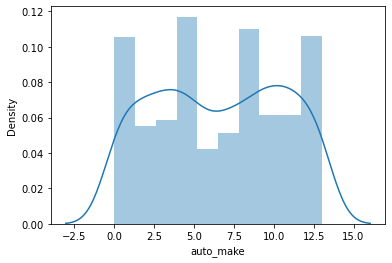

In [462]:
sns.distplot(df9["auto_make"])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

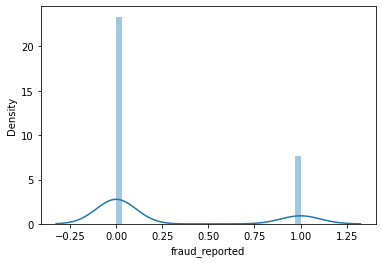

In [463]:
sns.distplot(df9["fraud_reported"])

In [464]:
df9.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.008808


<AxesSubplot:>

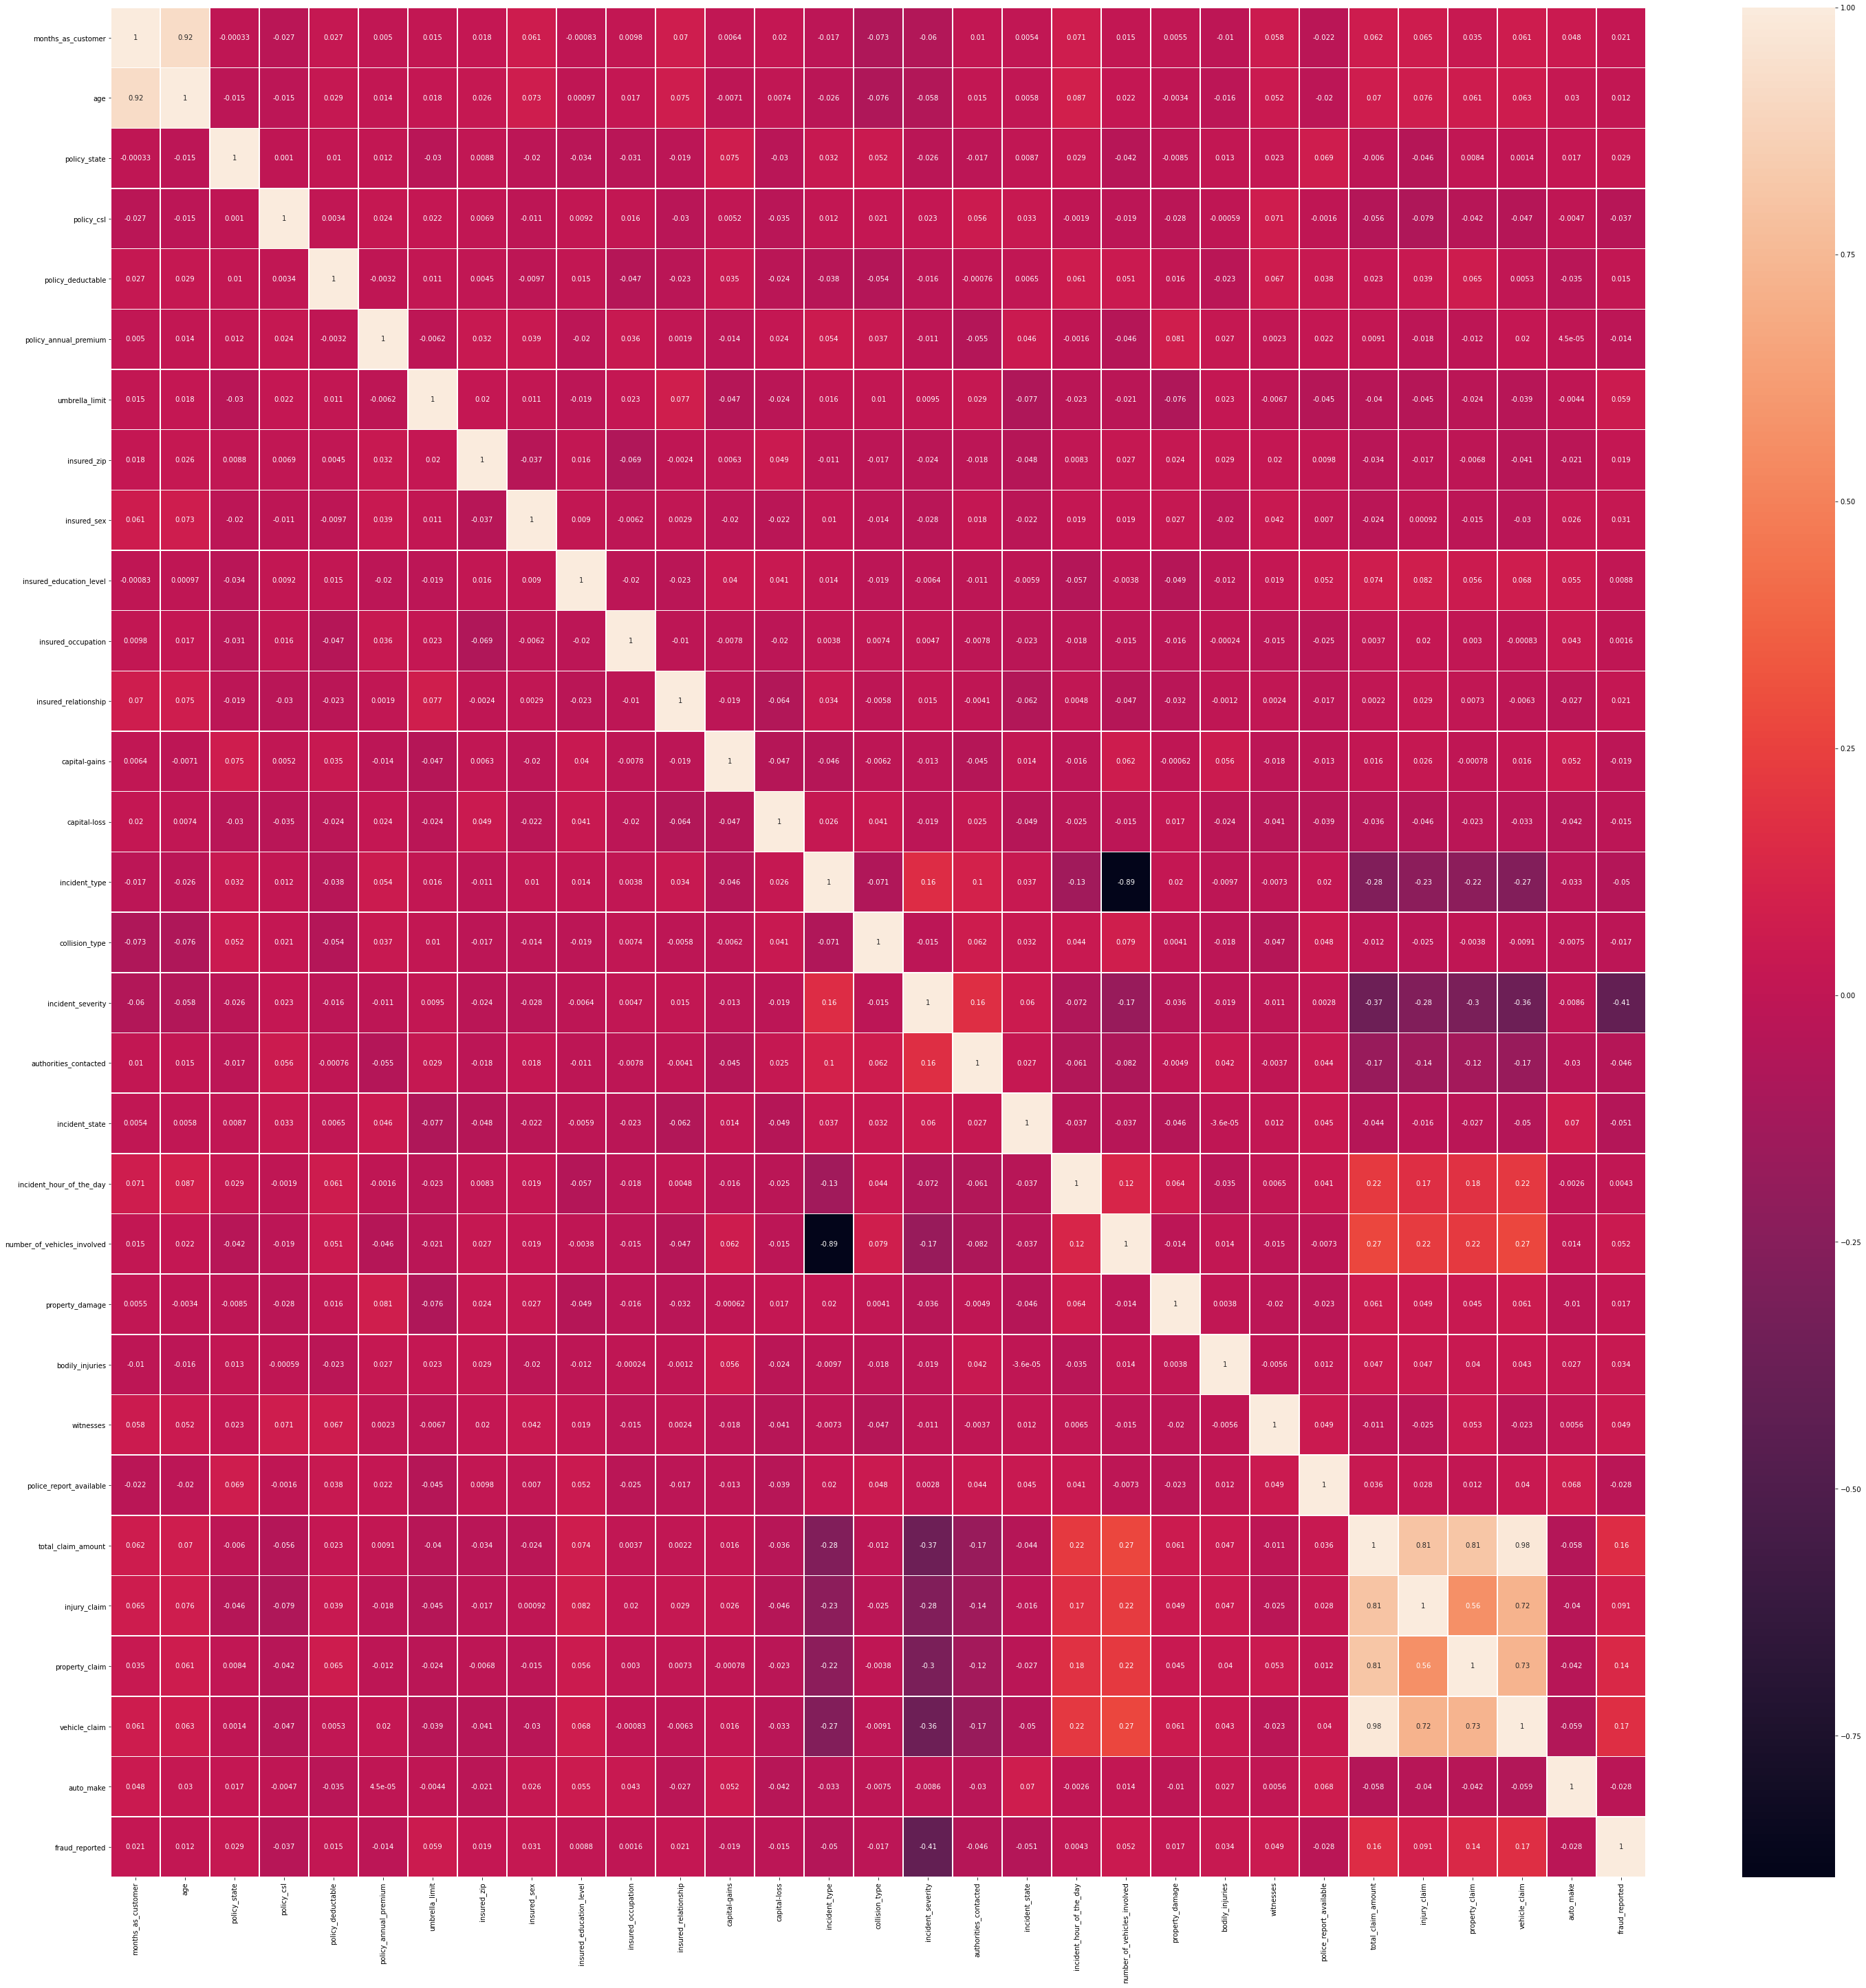

In [465]:
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(df9.corr(),annot=True, linewidth=0.5,)

These attributed are highly corelated considering only oe of them:'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim'

months_as_customer, age are also corrlated, keeping month_as_customr

In [466]:
df10=df9.drop(columns='injury_claim')
df32=df10.drop(columns='age')
df11=df32.drop(columns='property_claim')
df12=df11.drop(columns='vehicle_claim')

In [467]:
df12.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582


In [468]:
q3=df12.quantile(0.75)

In [469]:
q1=df12.quantile(0.25)

In [470]:
iqr=q3-q1

In [471]:
umb_limit=(q3.umbrella_limit+(1.5*iqr.umbrella_limit))

In [472]:
index1=np.where(df12['umbrella_limit']>umb_limit)

In [473]:
df12=df12.drop(df12.index[index1])

In [474]:
umb=q1.umbrella_limit-(1.5*iqr.umbrella_limit)

In [475]:
index2=np.where(df12['umbrella_limit']<umb)

In [476]:
df12=df12.drop(df12.index[index2])

In [477]:
df12.reset_index()

,index,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,fraud_reported
0,0,328,2,1,1000,1406.91,0,466132,1,4,...,4,5,1,1,1,2,1,71610,10,1
1,5,256,2,1,1000,1351.10,0,478456,0,6,...,4,19,3,0,0,2,0,64100,10,1
2,6,137,1,1,1000,1333.35,0,441716,1,6,...,1,0,3,0,0,0,0,78650,9,0
3,7,165,0,0,1000,1137.03,0,603195,1,0,...,5,23,3,0,2,2,1,51590,1,0
4,8,27,0,0,500,1442.99,0,601734,0,6,...,6,21,1,0,1,1,1,27700,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,993,124,2,1,1000,1235.14,0,443567,1,4,...,2,20,3,0,0,1,0,60200,13,0
794,994,141,1,2,1000,1347.04,0,430665,1,2,...,4,6,1,0,1,2,1,6480,6,0
795,995,3,2,2,1000,1310.80,0,431289,0,5,...,0,20,1,1,0,1,0,87200,6,0
796,996,285,0,0,1000,1436.79,0,608177,0,6,...,4,23,1,1,2,3,0,108480,13,0


In [478]:
df12.skew()

months_as_customer             0.367763
policy_state                  -0.037487
policy_csl                     0.098571
policy_deductable              0.479464
policy_annual_premium          0.017987
umbrella_limit                 0.000000
insured_zip                    0.827391
insured_sex                    0.166295
insured_education_level       -0.015064
insured_occupation            -0.037621
insured_relationship           0.153070
capital-gains                  0.457099
capital-loss                  -0.402005
incident_type                  0.117041
collision_type                -0.021119
incident_severity              0.264910
authorities_contacted         -0.099181
incident_state                -0.210214
incident_hour_of_the_day      -0.036648
number_of_vehicles_involved    0.470499
property_damage                0.775425
bodily_injuries                0.050752
witnesses                      0.010311
police_report_available        0.738617
total_claim_amount            -0.613178


<AxesSubplot:>

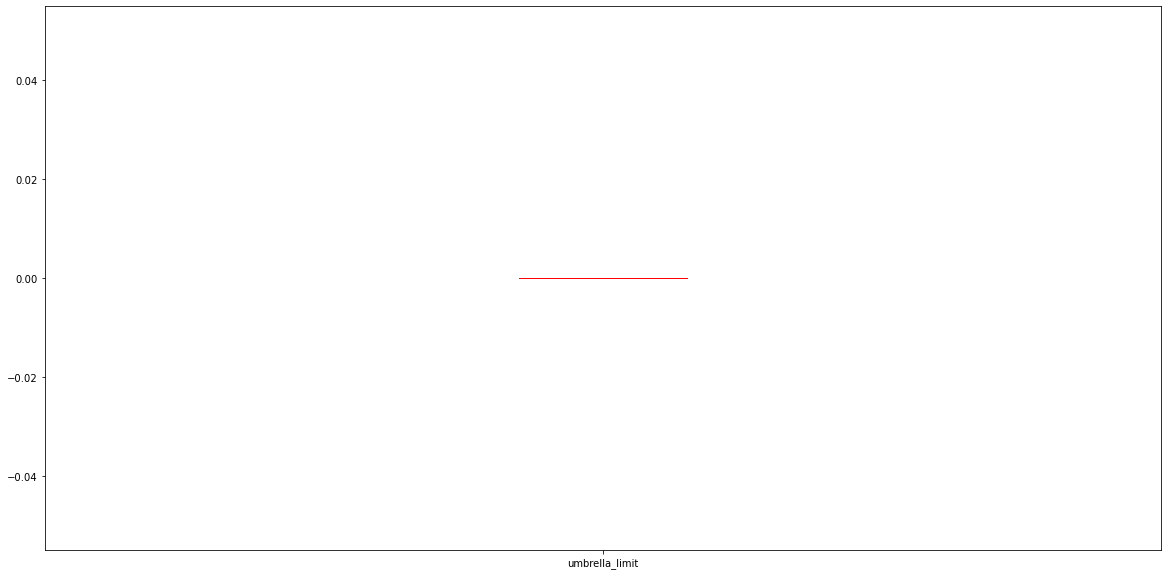

In [479]:
df12["umbrella_limit"].plot(kind='box', figsize=(20,10), color='r')

In [487]:
df21=df12.drop(columns='umbrella_limit')
df_1=df21.drop(columns='incident_type')

high correlation between number_of_vehicles_involved and incident_type, dropped on

In [488]:
df_1.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'auto_make', 'fraud_reported'],
      dtype='object')

In [489]:
df_1.shape

(798, 25)

# EDA Concluding Remarks:
1. replaced all object to float.
2. replaced NaN 
3. Resolve corelation

# Pre-processing Pipeline

In [490]:
x=df_1.drop(columns='fraud_reported')
y=df_1['fraud_reported']

In [491]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.09097081,  1.18073016,  0.06658062, ...,  1.43438881,
         0.70158389,  0.86085293],
       [ 0.45933588,  1.18073016,  0.06658062, ..., -0.69716104,
         0.41566533,  0.86085293],
       [-0.5846163 , -0.02415816,  0.06658062, ..., -0.69716104,
         0.96960874,  0.61258382],
       ...,
       [-1.76015908,  1.18073016,  1.30219307, ..., -0.69716104,
         1.29512188, -0.13222353],
       [ 0.71374439, -1.22904648, -1.16903183, ..., -0.69716104,
         2.10528792,  1.60566027],
       [ 2.21387735,  1.18073016,  0.06658062, ..., -0.69716104,
        -1.83208855,  0.3643147 ]])

In [492]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [493]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.047204,months_as_customer
1,1.038281,policy_state
2,1.020047,policy_csl
3,1.030957,policy_deductable
4,1.034071,policy_annual_premium
5,1.028218,insured_zip
6,1.019996,insured_sex
7,1.037307,insured_education_level
8,1.021424,insured_occupation
9,1.023416,insured_relationship


Now VIF lss han 5 good to go ahead.

# Building Machine Learning Model

In [495]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [499]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# KNN algorithm

In [500]:
knn=KNeighborsClassifier()

In [501]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [502]:
y_predict=knn.predict(x_test)

In [503]:
accuracy_score(y_test, y_predict)

0.765

In [504]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[144,  11],
       [ 36,   9]], dtype=int64)

In [505]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       155
           1       0.45      0.20      0.28        45

    accuracy                           0.77       200
   macro avg       0.62      0.56      0.57       200
weighted avg       0.72      0.77      0.73       200



In [506]:
from sklearn.model_selection import cross_val_score

In [510]:
cross_val=cross_val_score(knn,x,y,cv=7)
cross_val.mean()

0.7205513784461154

In [514]:
from sklearn.model_selection import GridSearchCV

In [515]:
param_grid ={'algorithm':['kd_tree','brute'] , 'leaf_size':[10,11,14,18,20,25,30]}

In [517]:
grid_search = GridSearchCV(knn, param_grid)

In [518]:
grid_result = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'algorithm': 'kd_tree', 'leaf_size': 10}


In [519]:
kn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10)

In [520]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10)

In [522]:
y_predict1=kn.predict(x_test)

In [523]:
accuracy_score(y_test, y_predict1)

0.765

In [524]:
cfm=confusion_matrix(y_test,y_predict1)
cfm

array([[144,  11],
       [ 36,   9]], dtype=int64)

In [525]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       155
           1       0.45      0.20      0.28        45

    accuracy                           0.77       200
   macro avg       0.62      0.56      0.57       200
weighted avg       0.72      0.77      0.73       200



best score= 77%

# Decision Tree Classifier

In [527]:
from sklearn.tree import DecisionTreeClassifier

In [528]:
tree=DecisionTreeClassifier()

In [529]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [530]:
tree.score(x_train,y_train)

1.0

In [531]:
y_pred=tree.predict(x_test)

In [532]:
accuracy_score(y_test,y_pred)

0.74

In [533]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[126,  29],
       [ 23,  22]], dtype=int64)

In [534]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       155
           1       0.43      0.49      0.46        45

    accuracy                           0.74       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.75      0.74      0.75       200



In [535]:
cross_val=cross_val_score(tree,x,y,cv=5)
cross_val.mean()

0.7118396226415094

In [536]:
grid_param1={'criterion':['gini','entropy'], 'max_depth':range(10,15),
           'min_samples_split':range(3,10)}

In [537]:
grid_search1=GridSearchCV(tree, param_grid=grid_param1, cv=5)

In [538]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_split': range(3, 10)})

In [539]:
grid_result1 = grid_search1.fit(x_train, y_train)
print('Best Params: ', grid_result1.best_params_)

Best Params:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 7}


In [542]:
tree1=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split= 7)

In [543]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=7)

In [544]:
tree1.score(x_train,y_train)

0.9698996655518395

In [545]:
y_pre=tree1.predict(x_test)

In [546]:
accuracy_score(y_test,y_pre)

0.745

In [547]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[127,  28],
       [ 23,  22]], dtype=int64)

In [548]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       155
           1       0.44      0.49      0.46        45

    accuracy                           0.74       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.76      0.74      0.75       200



Decesion tree score=74%

## Logistic Regression


In [549]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [550]:
y_predict_test = classifier.predict(x_test)

In [551]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[140,  15],
       [ 28,  17]], dtype=int64)

In [552]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       155
           1       0.53      0.38      0.44        45

    accuracy                           0.79       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.77      0.79      0.77       200



In [557]:
cross_val=cross_val_score(classifier, x,y,cv=10)
cross_val.mean()

0.7669303797468354

In [558]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [559]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.1}


In [560]:
clas=LogisticRegression(C=0.1)

In [561]:
clas.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [562]:
y_predict_t = clas.predict(x_test)

In [563]:
cm = confusion_matrix(y_test, y_predict_t)
cm

array([[143,  12],
       [ 35,  10]], dtype=int64)

In [564]:
accuracy_score(y_test, y_predict_t)

0.765

In [565]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       155
           1       0.45      0.22      0.30        45

    accuracy                           0.77       200
   macro avg       0.63      0.57      0.58       200
weighted avg       0.72      0.77      0.73       200



logistic Regression score: 77%

## Random Forest

In [566]:
from sklearn.ensemble import RandomForestClassifier

In [567]:
clf=RandomForestClassifier()

In [568]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [569]:
y_pr=clf.predict(x_test)

In [570]:
accuracy_score(y_test, y_pr)

0.79

In [571]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       155
           1       0.54      0.42      0.48        45

    accuracy                           0.79       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.78      0.79      0.78       200



In [572]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[139,  16],
       [ 26,  19]], dtype=int64)

In [574]:
cross_val=cross_val_score(clf, x,y,cv=5)
cross_val.mean()

0.7857468553459119

In [575]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [576]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params:  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3}


In [577]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.7776046901172529


In [578]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3)

In [579]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3)

In [580]:
y_pr1=rf.predict(x_test)

In [581]:
accuracy_score(y_test, y_pr1)

0.755

In [582]:
cm_r = confusion_matrix(y_test, y_pr1)
cm_r

array([[142,  13],
       [ 36,   9]], dtype=int64)

In [583]:
accuracy_score(y_test, y_pr1)

0.755

In [584]:
print(classification_report(y_test, y_pr1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       155
           1       0.41      0.20      0.27        45

    accuracy                           0.76       200
   macro avg       0.60      0.56      0.56       200
weighted avg       0.71      0.76      0.72       200



random forest 76%

## Saving Model Logistic regression as it has highest accuracy score

In [587]:
import pickle
filename='Insurance Claim-fraud.pickle'
pickle.dump(clas,open(filename,'wb'))